### This code is for eductational purposes only to understand how optimization is done in a Neural Network.
### While this uses some not so efficient ways to achieve results, it can made more optimal using numpy functions or with higher level libraries like Keras and Tensorflow

In [ ]:
#this implementation is a modification of the code from "Code Machine Learning Algorithms From Scratch" 
#and the tutorials from the Backropagation Quiz

# the code for drawing the neural net was originally developed by @craffel and improved by @ljhuang2017: https://gist.github.com/craffel/2d727968c3aaebd10359
# it has been modified to use Python 3

### Let's start by importing some essential libraries

In [1]:
import numpy as np
import pandas as pd
from math import exp

import matplotlib.pyplot as plt

# our fun library to draw the network
from draw_neural_net import draw_neural_net

# increase the maximum column width of pandas for better display
pd.set_option('display.max_colwidth', 100)


### Next we will create the neural network from the Backpropagation Tutorial

In [2]:
# input training_data (X1, X2, Y)

num_inputs = 2
num_outputs = 1 #2 example in tutorial document
learn_rate = 0.5

training_data = [[0.05,0.10,0.01]]

def create_neuralnet():
    #create neuralnet weights and biases
    neuralnet = list()
    hidden_layer = [{'weights': [0.15, 0.20, 0.35]}, 
                    {'weights': [0.25, 0.30, 0.35]}
                   ]
    
    neuralnet.append(hidden_layer)
    output_layer = [{'weights': [0.40, 0.45, 0.6]}, 
                    #{'weights': [0.50, 0.55, 0.6]} #weight for neuron 02 for 2 outputs
                   ]
    
    neuralnet.append(output_layer)
    return neuralnet

neuralnet = create_neuralnet()
neuralnet

[[{'weights': [0.15, 0.2, 0.35]}, {'weights': [0.25, 0.3, 0.35]}],
 [{'weights': [0.4, 0.45, 0.6]}]]

### Before starting the optimization process i.e backpropagation, we will create 2 small functions to help in drawing the network

In [3]:

def unpack_neuralnet(neuralnet):
    #empty lists to hold the weights and biases
    weights_ = list()
    biases_ = list()
    
    #iterate over neuralnet to set the weights 
    for layer in neuralnet:
        df_layer = pd.DataFrame(layer)
        weights_.append(np.array([row[:-1] for row in df_layer['weights']]))
        biases_.append(np.array([row[-1] for row in df_layer['weights']]))
        
    return weights_, biases_
        
weights, biases = unpack_neuralnet(neuralnet)

In [4]:
#format the network into format of draw_neural_net
def format_network(weights):
    index = list()

    for row in weights[-1].tolist():
        for number in row:
            index.append([number])

    index = np.array(index)

    weights = weights[:-1]
    weights.append(index)
    
    return weights

weights = format_network(weights)

In [5]:
no_hidden_layer_neurons = (2,)
no_epochs = 0
total_error_in_network = 0.0

neurons_per_layer = [2] + list(no_hidden_layer_neurons) + [1]

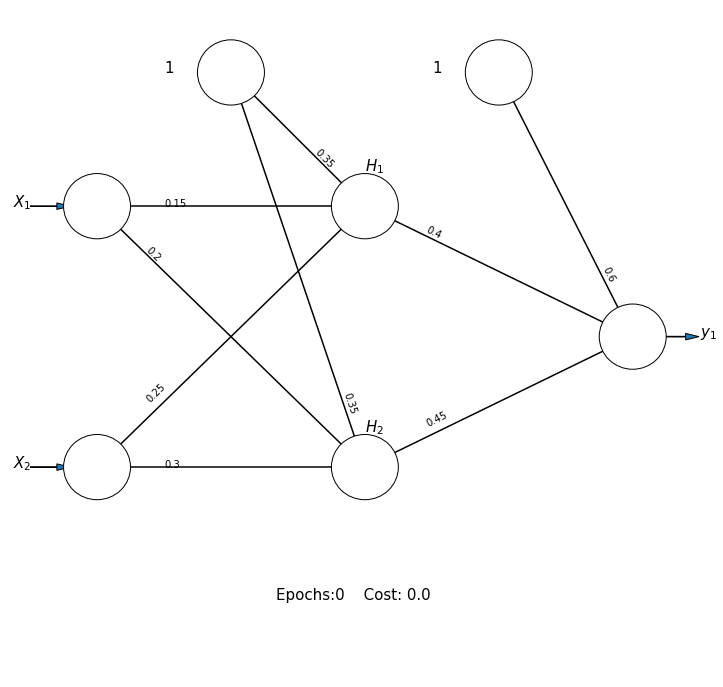

In [6]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

draw_neural_net(ax, .1, .9, .1, .9, neurons_per_layer, weights, biases, no_epochs, total_error_in_network)
plt.show()
#fig.savefig('nn_digaram.png')

# The Forward Pass

<img src="forward_pass.jpg">

### To begin, let’s see what the neural network currently predicts given the weights and biases above and inputs of 0.05 and 0.10. To do this we’ll feed those inputs forward though the network.
### We figure out the total net input to each hidden layer neuron, squash the total net input using an activation function (here we use the logistic function), then repeat the process with the output layer neurons

<img src="logistic.jpg">

In [7]:
#first we create the logistic function
def activation_function(neuron):
    return 1.0 / (1.0 + exp(-neuron))

In [8]:
# Forward propagate input to a neuralnet output
def forward_pass(neuralnet, training_data):
    inputs = training_data
    
    #using the formula, we check each layer in the network  
    for layer in neuralnet:
        new_inputs = list()
        print("Current Layer", layer)
        
        #then we multiply the inputs of our training data by the weights in the network
        for neuron in layer:
            
            #remember, our bias is the last weight in the network
            total_net = neuron['weights'][-1]
        
            #we loop through the network to multiply weights by input and add bias (except bias, hence -1) 
            for i in range(len(neuron['weights']) - 1):
                
                total_net += neuron['weights'][i] * inputs[i]
            
            print("\nNet Output Before Activation: ", total_net)
            
            #squash the total net input
            neuron['output'] = activation_function(total_net)
            print("Net Output After Activation: ", neuron['output'])
            
            #We repeat this process for the output layer neurons, 
            #using the output from the hidden layer neurons as inputs
            new_inputs.append(neuron['output'])
        inputs = new_inputs
        
        df_layer = pd.DataFrame(layer)
        print("\nFinal Feed Forward Layer")
        print(df_layer[['weights', 'output']])
        print("------------------------------\n\n") 
        
    return inputs

### Let's see how our network looks like after one forward pass

In [9]:
first_pass_inputs = list()
for input in training_data:
    first_pass_inputs.append(forward_pass(neuralnet, input))

Current Layer [{'weights': [0.15, 0.2, 0.35]}, {'weights': [0.25, 0.3, 0.35]}]

Net Output Before Activation:  0.3775
Net Output After Activation:  0.5932699921071872

Net Output Before Activation:  0.39249999999999996
Net Output After Activation:  0.596884378259767

Final Feed Forward Layer
             weights    output
0  [0.15, 0.2, 0.35]  0.593270
1  [0.25, 0.3, 0.35]  0.596884
------------------------------


Current Layer [{'weights': [0.4, 0.45, 0.6]}]

Net Output Before Activation:  1.1059059670597702
Net Output After Activation:  0.7513650695523157

Final Feed Forward Layer
            weights    output
0  [0.4, 0.45, 0.6]  0.751365
------------------------------




In [10]:
# a view at our current network
neuralnet

[[{'weights': [0.15, 0.2, 0.35], 'output': 0.5932699921071872},
  {'weights': [0.25, 0.3, 0.35], 'output': 0.596884378259767}],
 [{'weights': [0.4, 0.45, 0.6], 'output': 0.7513650695523157}]]

In [11]:
#since we are only using one output neuron in this example, 
#we can calculate our error at this point by taking the square of our (target - predicted)
target_variables = [[training_data[0][-1], 1 - training_data[0][-1]]]

total_cost=0                     
for target in target_variables:
    total_cost += sum([(target[i] - first_pass_inputs[0][i])**2 for i in range(num_outputs)])

print("The total error for the neural network is", total_cost)

The total error for the neural network is 0.54962216635231


# The Backwards Pass

### Our goal with backpropagation is to update each of the weights in the network so that they cause the actual output to be closer the target output, thereby minimizing the error for each output neuron and the network as a whole.
### Considering weight w5, we calculate the partial derivative of total error with respect to w5 as:

In [12]:
# Create the reverse of our logistic function i.e the derivative
def derivative_function(output_neuron):
    return output_neuron * (1.0 - output_neuron)

In [13]:
def backward_pass(neuralnet, training_data):
    total_errors_list = list()
    
    #this is a backward pass, hence we try to replicate the same steps as before
    #but in reverse :-)
    for i in reversed(range(len(neuralnet))):
        layer = neuralnet[i]
        total_errors = list()
        
        if i != len(neuralnet) - 1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in neuralnet[i + 1]:
                    
                    error += (neuron['weights'][j] * neuron['delta'])
                total_errors.append(error)
            
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                total_errors.append(-(target_variables[0][j] - neuron['output']))

        
        #unsquash our output :-)
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['derivative'] = derivative_function(neuron['output']) 
            neuron['delta'] = total_errors[j] * neuron['derivative']
        total_errors_list.append(total_errors)

    return total_errors_list

In [14]:
total_errors_list = backward_pass(neuralnet, training_data)

total_errors_list

[[0.7413650695523157], [0.05539942465142279, 0.06232435273285064]]

### We will now got through the network to update all weights using the chain rule

<img src="backward_pass.jpg">

In [15]:
def update_weights(neuralnet, row, learn_rate, total_errors_list):
    for i in reversed(range(len(neuralnet))):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in neuralnet[i - 1]]
        
        for neuron in neuralnet[i]:
            print("\nCurrent Layer: ", neuron['weights'])
            for j in range(len(inputs)):
                
                print("\nCalculating New Weights for: ", neuron['weights'][j], "\n")
                print("---------------------\n")
                
                #First, how much does the total error change with respect to the output?
                change_total_output = total_errors_list[0][0]
                if (j != 1):
                    change_total_output = total_errors_list[len(neuralnet) - 1 - i][j]
                    
                print("Change In Total Error with Respect to Output: ", change_total_output)

                
                #Next, how much does the output change with respect to its total net input?
                #this is the derivative calculated in the back pass function
                print("Change In Output With Respect To Net Input: ", neuron['derivative'])

                
                #Finally, how much does the total net input change with respect to weight?
                print("Change in Net Input With Respect to Weight", inputs[j])

                
                #Now using the chain rule formula as shown above
                print("--Putting All Together: Change in Total Error With Respect to Weight", 
                      change_total_output * neuron['derivative'] * inputs[j])

                #To decrease the error, we then subtract this value from the current weight 
                #(optionally multiplied by some learning rate: we used 0.5 above):
                neuron['weights'][j] -= learn_rate * neuron['delta'] * inputs[j]
                print("\nUpdated Weight: ", neuron['weights'][j], "\n")
                
            neuron['weights'][-1] -= learn_rate * neuron['delta']

In [16]:
for input in training_data:
    print(input)
    update_weights(neuralnet, input, learn_rate, total_errors_list)

[0.05, 0.1, 0.01]

Current Layer:  [0.4, 0.45, 0.6]

Calculating New Weights for:  0.4 

---------------------

Change In Total Error with Respect to Output:  0.7413650695523157
Change In Output With Respect To Net Input:  0.18681560180895948
Change in Net Input With Respect to Weight 0.5932699921071872
--Putting All Together: Change in Total Error With Respect to Weight 0.08216704056423078

Updated Weight:  0.35891647971788465 


Calculating New Weights for:  0.45 

---------------------

Change In Total Error with Respect to Output:  0.7413650695523157
Change In Output With Respect To Net Input:  0.18681560180895948
Change in Net Input With Respect to Weight 0.596884378259767
--Putting All Together: Change in Total Error With Respect to Weight 0.08266762784753326

Updated Weight:  0.4086661860762334 


Current Layer:  [0.15, 0.2, 0.35]

Calculating New Weights for:  0.15 

---------------------

Change In Total Error with Respect to Output:  0.05539942465142279
Change In Output With 

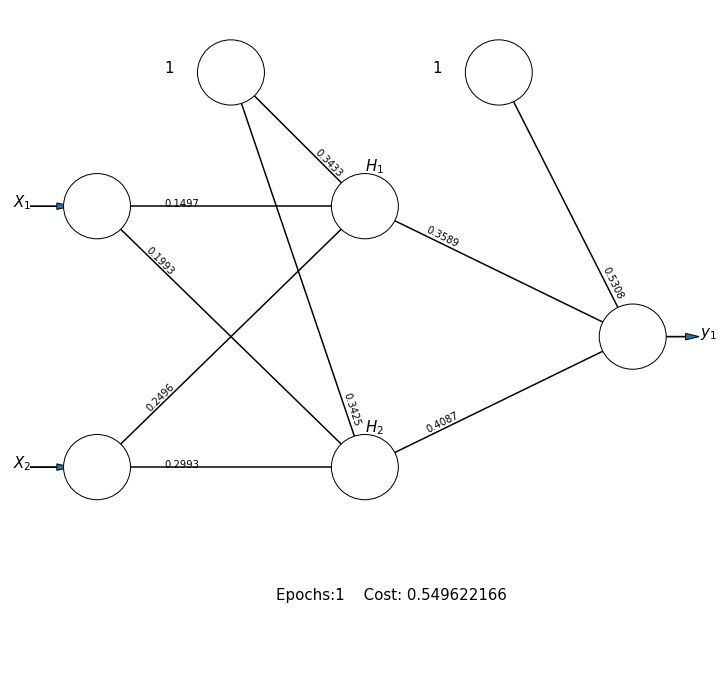

In [19]:
weights, biases = unpack_neuralnet(neuralnet)
weights = format_network(weights)

no_epochs = 1

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

draw_neural_net(ax, .1, .9, .1, .9, neurons_per_layer, weights, biases, no_epochs, total_cost)
plt.show()